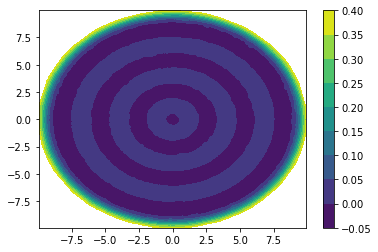

In [3]:
import matplotlib.pyplot as plt
import math 
import numpy as np
#ベッセル関数の読み込み
from scipy.special import jv
#3dデータを上手く加工する
from scipy.interpolate import griddata



#円筒銅線の材料パラメーター

#電気伝導率σ
sigma = 1.0
#透磁率μ
mu = 1.0

#角周波数
omega = 10
#電流値
I=1.0
#銅線の半径
r_0=10

k= (-1j*omega*mu*sigma)**0.5

#プロット

NUM=10000                          # サンプリング数
x=0                                     # 点のx値
y=0                                     # 点のy値                                  
#zを求めるために使用
i=0   



#a<r<b つまり -r_0<r<r_0の範囲で乱数を生成する
a=-1*r_0
b=r_0

x_a=[]
y_a=[]
z_a=[]
                                  # ループカウンタ
while i<NUM:                            # NUM回ループ
    x=(b - a) * np.random.rand() + a                  # ランダムな点の位置x a<x<bにおけるランダムな点を作成
    y=(b - a) * np.random.rand() + a                  # ランダムな点の位置y
    if x**2+y**2<r_0**2:                      # 円筒内部ならば
 
        z= (k*I/(2*math.pi))*jv(0,k*(x**2+y**2)**0.5)/jv(1,k*r_0)
        x_a.append(x)
        y_a.append(y)
        z_a.append(z)
    else:                               # 円の外
        #plt.scatter(x,y,color='blue')
        z=0   
    i+=1                                # ループカウンタ増


#データの整理
x_new, y_new = np.meshgrid(np.unique(x_a), np.unique(y_a))
z_new = griddata((x_a, y_a), z_a, (x_new, y_new))


#コンター図で表示する
plt.contourf(x_new, y_new, z_new)
#カラーバー
plt.colorbar()
plt.show()